In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web

In [ ]:
# Retrive all google stock from the s_date to the end_date
s_date='6/1/2010'  # start date
e_date='6/1/2020'  # end date

# Retrieve a ticker (e.g. WMT) from yahoo finance
ticker_name='WMT'
wmt = web.DataReader(ticker_name, data_source='yahoo',  start=s_date, end=e_date)
print('\n Total ' + str(len(wmt)) +' records\n')
wmt.head()


 Total 2518 records



,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-01,51.509998,50.520000,50.799999,50.919998,16053600.0,39.625427
2010-06-02,51.740002,51.020000,51.230000,51.720001,13665800.0,40.247982
2010-06-03,52.080002,51.480000,51.730000,51.720001,10509100.0,40.247982
2010-06-04,51.700001,50.220001,51.410000,50.400002,24041900.0,39.220764
2010-06-07,51.369999,50.320000,50.459999,50.740002,19500600.0,39.485348


In [ ]:
wmt.describe().T
wmt['UP_DOWN']=wmt["Open"]-wmt["Close"]>0
wmt['LogReturn'] = np.log(wmt['Close']/wmt['Close'].shift(1))
wmt.head()

,High,Low,Open,Close,Volume,Adj Close,UP_DOWN,LogReturn
Date,,,,,,,,
2010-06-01,51.509998,50.520000,50.799999,50.919998,16053600.0,39.625427,False,NaN
2010-06-02,51.740002,51.020000,51.230000,51.720001,13665800.0,40.247982,False,0.015589
2010-06-03,52.080002,51.480000,51.730000,51.720001,10509100.0,40.247982,True,0.000000
2010-06-04,51.700001,50.220001,51.410000,50.400002,24041900.0,39.220764,True,-0.025853
2010-06-07,51.369999,50.320000,50.459999,50.740002,19500600.0,39.485348,False,0.006723


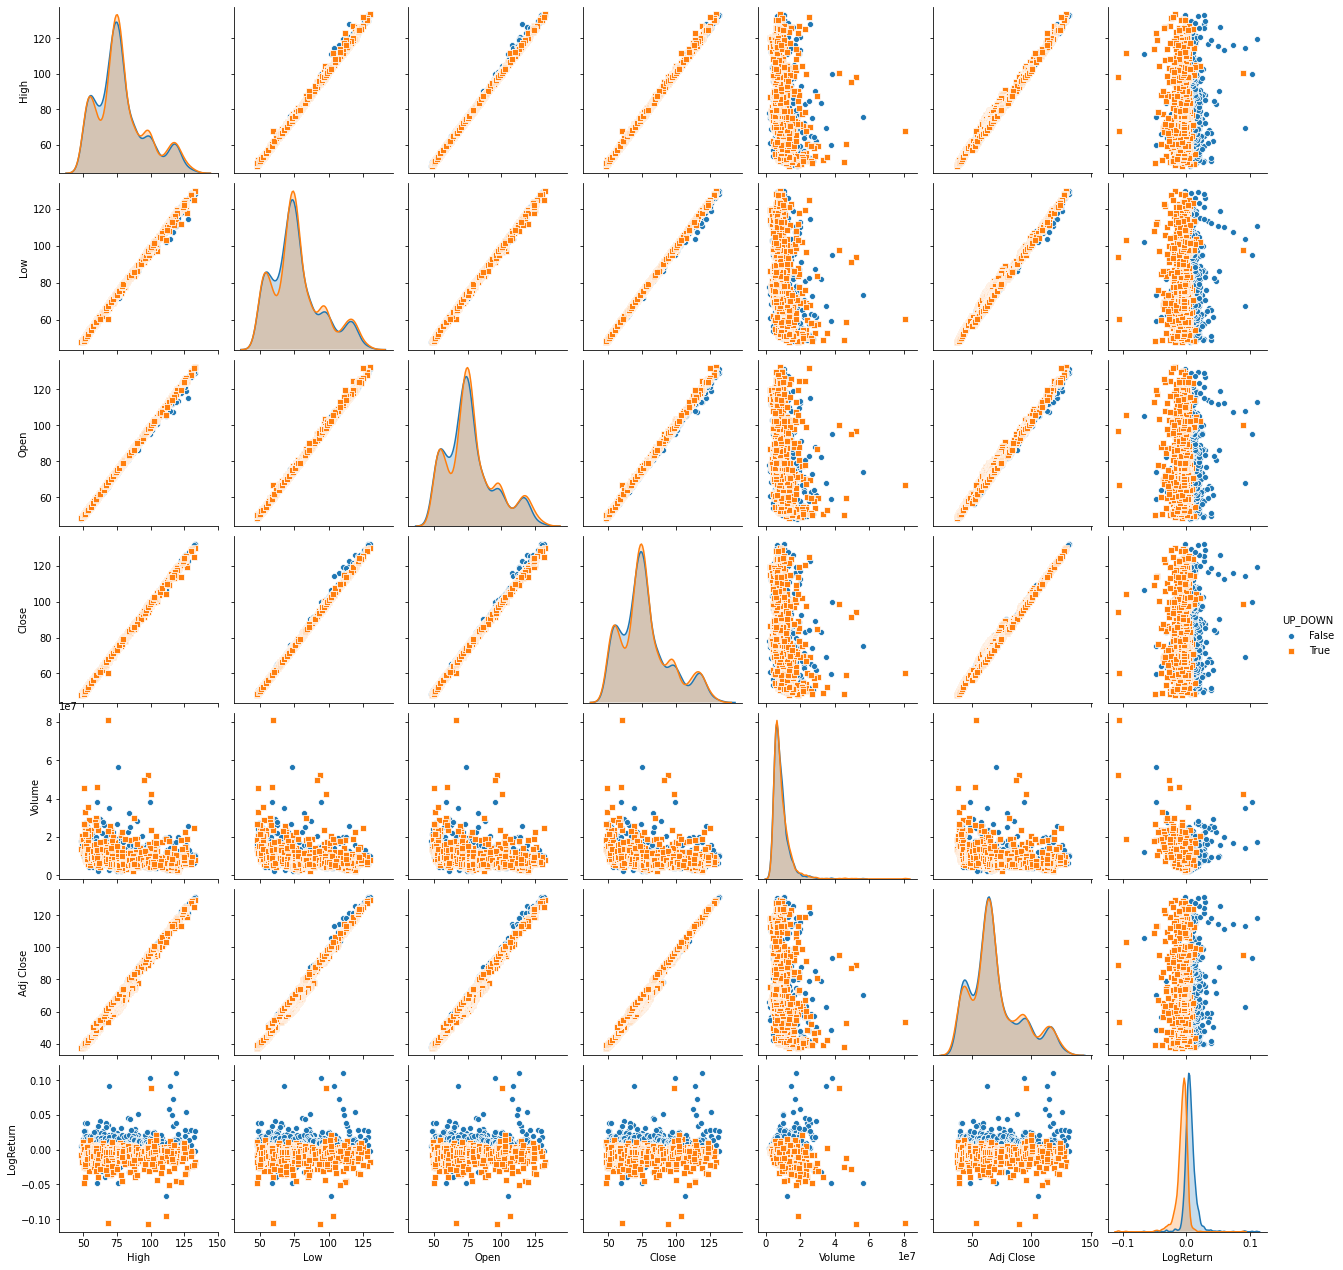

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data=wmt, hue='UP_DOWN', markers=['o', 's'])

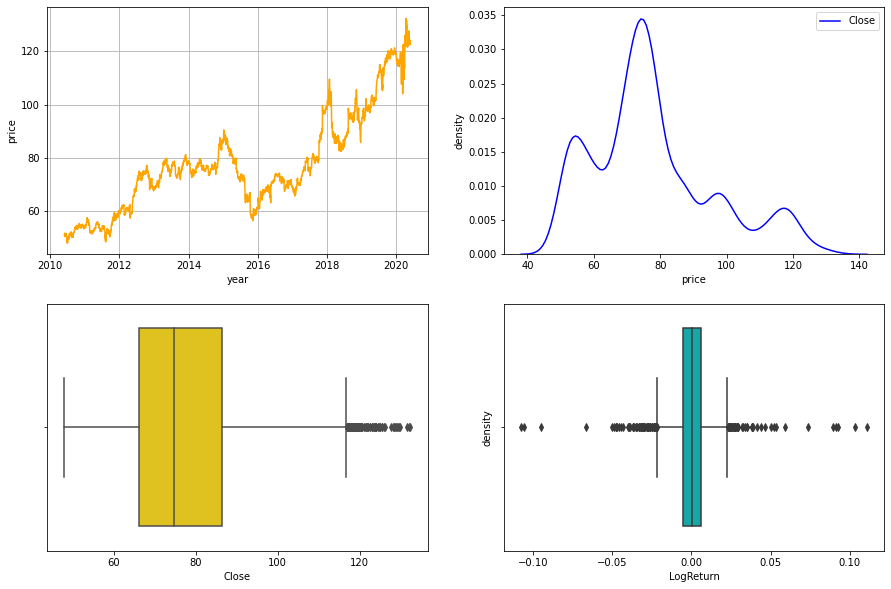

In [ ]:
fig=plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.plot(wmt['Close'], c='orange')
plt.xlabel('year')
plt.ylabel('price')
plt.grid('on')

plt.subplot(2,2,2)
sns.kdeplot(wmt['Close'], color='b')
plt.xlabel('price')
plt.ylabel('density')

plt.subplot(2,2,3)
sns.boxplot(wmt['Close'], color='gold')
plt.subplot(2,2,4)
sns.boxplot(wmt['LogReturn'], color='c')
plt.ylabel('density')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
## biplot basic specificiation
## Method: generally speaking, it can be any dimension reduction method
##         such as 'pca', 'spca', 'tsne', 'umap'
def biplot(newData, label_1, label_2, label_1_name, label_2_name, Method):
    ##label 1
    plt.scatter(newData[label_1, 0], newData[label_1, 1], label=label_1_name,
                marker='o', color='hotpink', edgecolors='b', alpha=0.95, s=25)

    ## label 2
    plt.scatter(newData[label_2, 0], newData[label_2, 1], label=label_2_name,
                marker='o', color='r', edgecolors='g', alpha=0.95, s=22)
    
    plt.legend()

    ax=plt.gca()
    ax.legend(prop={'size': 10})
    if Method=='pca':
      plt.xlabel('$PC_{1}$', fontsize=10)
      plt.ylabel('$PC_{2}$', fontsize=10)
    elif Method=='spca':
      plt.xlabel('$SPC_{1}$', fontsize=10)
      plt.ylabel('$SPC_{2}$', fontsize=10)
    else:
      plt.xlabel('$'+ Method +'_{1}'+'$', fontsize=8)
      plt.ylabel('$'+ Method +'_{2}'+'$', fontsize=8)

In [ ]:
wmt.head()
data=wmt.iloc[:, 0:wmt.shape[1]-1].copy()
data=data.dropna()


In [ ]:
import umap
umapNewData= umap.UMAP(n_neighbors=30,
                      min_dist=0.05,
                      metric='euclidean',
                      init='random').fit_transform(StandardScaler().fit_transform(data))

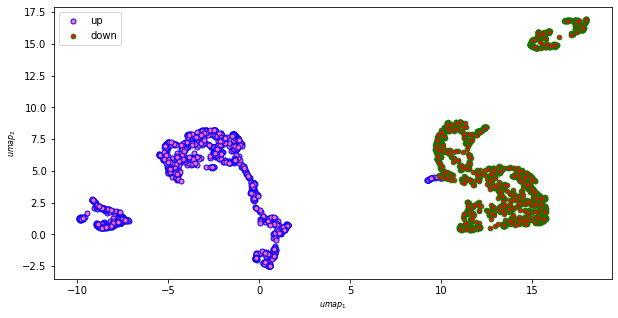

In [ ]:
fig_umap=plt.figure(figsize=(10, 5))

up =  data['UP_DOWN'] == True
down = data['UP_DOWN'] == False

biplot(umapNewData, up, down, 'up', 'down', 'umap')

In [ ]:
from sklearn.decomposition import PCA

# doPCA
# output is the new data in the PCA subspace (a ndarray)
def doPCA (data):
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data)
    
    pca=PCA()
    newPCAData=pca.fit_transform(normalized_data)
    return newPCAData

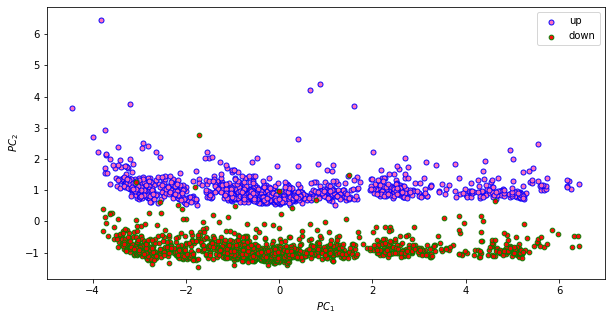

In [ ]:
pcaNewData=doPCA(data)
fig_umap=plt.figure(figsize=(10, 5))
biplot(pcaNewData, up, down, 'up', 'down', 'pca')

In [ ]:
from sklearn.decomposition import SparsePCA
# do sparse PCA to get new data in the PCA space 
def doSparsePCA (data, sparseness):

  normalized_data=StandardScaler().fit_transform(data)
  spca = SparsePCA(alpha=sparseness)
  newData = spca.fit_transform(normalized_data)

  return newData

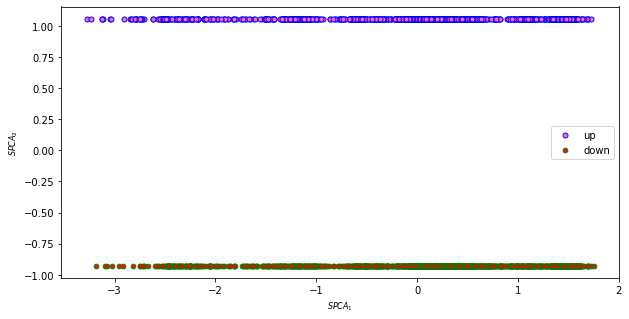

In [ ]:
# do biplot for sparse PCA

spcaNewData=doSparsePCA(data, 0.45)

fig_spca=plt.figure(figsize=(10, 5))
biplot(spcaNewData, up, down, 'up', 'down', 'SPCA')


In [ ]:
pcaNewData=doPCA(data)
fig=plt.figure(figsize=(10, 5))
biplot(spcaNewData, up, down, 'up', 'down', 'pca')

In [ ]:
from sklearn.manifold import TSNE
# do t-SNE to get new data in the TSNE space 
def doTSNE (data, perplexity, init):

  #normalized_data=StandardScaler().fit_transform(data)
  normalized_data=MinMaxScaler().fit_transform(data)
  tsne = TSNE(perplexity=perplexity, init=init)
  newData = tsne.fit_transform(normalized_data)

  return newData

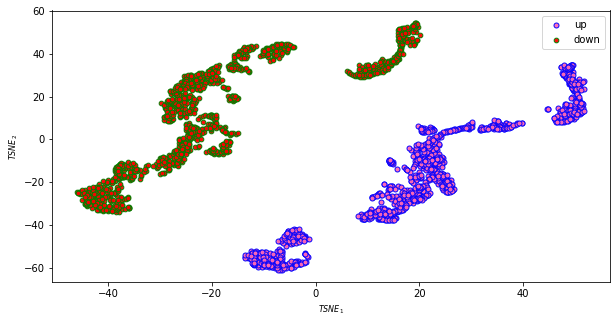

In [ ]:
# do biplot for tSNE
tsneNewData=doTSNE(data,50, 'pca')
fig_tsne=plt.figure(figsize=(10, 5))
biplot(tsneNewData, up, down, 'up', 'down', 'TSNE')